In [27]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Define the API URL
api_url = 'https://swapi.dev/api/planets/1/'

# Make the API request
response = requests.get(api_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response
    planet_data = response.json()

    # Display information about the planet
    print("Planet Name:", planet_data['name'])
    print("Climate:", planet_data['climate'])
    print("Diameter:", planet_data['diameter'])
    print("Gravity:", planet_data['gravity'])
    print("Orbital Period:", planet_data['orbital_period'])
    print("Population:", planet_data['population'])
    print("Residents:", planet_data['residents'])
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Planet Name: Alderaan
Climate: temperate
Diameter: 12500
Gravity: 1 standard
Orbital Period: 364
Population: 2000000000
Residents: ['https://swapi.dev/api/people/5/', 'https://swapi.dev/api/people/68/', 'https://swapi.dev/api/people/81/']


Basic Statistics for Diameter:
count        26.000000
mean      13538.730769
std       21815.007489
min           0.000000
25%        7287.250000
50%       10332.500000
75%       12435.000000
max      118000.000000
Name: diameter, dtype: float64


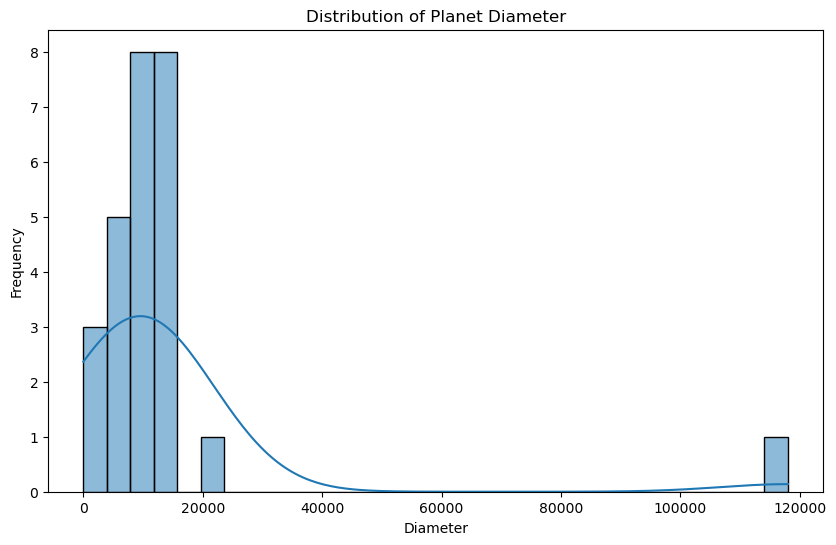

In [40]:
# Define the base API URL for planets
base_url = 'https://swapi.dev/api/planets/'

# Function to get data from a specific endpoint
def get_data(api_url):
    response = requests.get(api_url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

# Initialize an empty list to store planet data
all_planets_data = []

# Loop through planets
for planet_id in range(1, 27):  # Adjust the range as needed
    planet_url = f'{base_url}{planet_id}/'
    planet_data = get_data(planet_url)
    
    if planet_data:
        all_planets_data.append(planet_data)

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

# Convert diameter to numeric 
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'].str.replace(',', ''), errors='coerce')

# Basic EDA for diameter
print("Basic Statistics for Diameter:")
print(planets_df['diameter'].describe())

# Visualize the distribution of diameter
plt.figure(figsize=(10, 6))
sns.histplot(planets_df['diameter'].dropna(), bins=30, kde=True)
plt.title('Distribution of Planet Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()


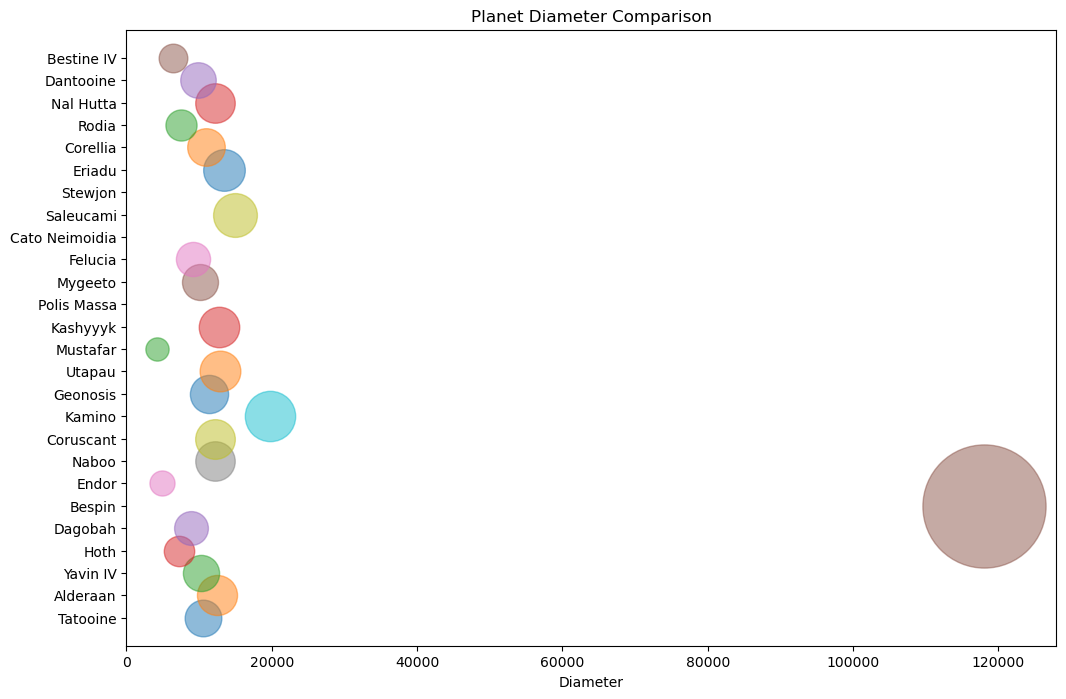

In [37]:
all_planets_data = []

# Loop through planets
for planet_id in range(1,27):  # Adjust the range as needed
    planet_url = f'{base_url}{planet_id}/'
    planet_data = get_data(planet_url)
    
    if planet_data:
        all_planets_data.append(planet_data)

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

# Convert diameter to numeric (it's currently a string with commas)
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'].str.replace(',', ''), errors='coerce')

# Plot circles for each planet based on diameter
plt.figure(figsize=(12, 8))
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=planet['diameter'],
        y=index,
        s=planet['diameter'] / 15,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

plt.title('Planet Diameter Comparison')
plt.xlabel('Diameter')
plt.yticks(range(len(planets_df)), planets_df['name'])
plt.xlim(0, planets_df['diameter'].max() + 10000)  # Set a custom limit for the x-axis
plt.show()

In [26]:
planets_df

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000,[https://swapi.dev/api/people/26/],[https://swapi.dev/api/films/2/],2014-12-10T11:43:55.240000Z,2014-12-20T20:58:18.427000Z,https://swapi.dev/api/planets/6/
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000,[https://swapi.dev/api/people/30/],[https://swapi.dev/api/films/3/],2014-12-10T11:50:29.349000Z,2014-12-20T20:58:18.429000Z,https://swapi.dev/api/planets/7/
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/
